# Predict Stock Price For Netflix 
Data from 2-5-2018 to 2-4-2022

Data set link https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction/data

Data set have 1009 rows , 7 columns

This model created by `Youssef Mustafa`

## Import libarary

In [59]:
# Numpy to create data as array
import numpy as np
# Pandas to Get data and develop it
import pandas as pd
# Matplotlib to vis data
import matplotlib.pyplot as plt
# Split data into train and test
from sklearn.model_selection import train_test_split
# Linear regression model
from sklearn.linear_model import LinearRegression
# Evaluate Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score


### Read dataset and print first 5 rows

In [60]:
# Read dataset 
df = pd.read_csv('Dataset/NFLX.csv')
# Print First 5 rows
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2/12/2018,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2/13/2018,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2/14/2018,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2/15/2018,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2/16/2018,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [61]:
# Create copy of dataset to visualize it 
viz = df.copy()

In [62]:
# Check if there null cell or not
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [63]:
# Print shape of dataset (Number of rows, columns) 
df.shape

(1009, 7)

In [64]:
# Prnit data info like column and number of rows of each column and if it null or not and data type of it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [65]:
# Print data describtion
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


### Split Dataset

In [66]:
# split data into train and test set with 20% to test and 80% of train
train, test = train_test_split(df, test_size = 0.2)

In [67]:
test_pred = test.copy()

In [68]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
289,4/1/2019,359.000000,368.329987,358.510010,366.959991,366.959991,7036100
510,2/14/2020,381.470001,385.149994,379.429993,380.399994,380.399994,3736300
317,5/10/2019,361.619995,365.260010,353.059998,361.040009,361.040009,5657100
335,6/6/2019,354.839996,358.209991,352.089996,357.130005,357.130005,3710000
675,10/9/2020,537.830017,544.280029,535.000000,539.440002,539.440002,4781300
649,9/2/2020,553.780029,556.500000,537.369995,552.840027,552.840027,5886900
684,10/22/2020,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
714,12/4/2020,497.500000,504.500000,493.640015,498.309998,498.309998,3666200
336,6/7/2019,357.390015,365.149994,355.690002,360.869995,360.869995,4777300
53,4/23/2018,329.149994,331.220001,317.079987,318.690002,318.690002,8968000


In [69]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
487,1/13/2020,331.799988,340.850006,331.510010,338.920013,338.920013,6290000
618,7/21/2020,506.000000,506.220001,488.609985,490.100006,490.100006,9113700
315,5/8/2019,367.920013,369.000000,361.359985,364.369995,364.369995,6572000
758,2/9/2021,546.000000,566.000000,543.000000,559.070007,559.070007,3703500
845,6/15/2021,501.230011,501.230011,490.399994,491.899994,491.899994,3104100
656,9/14/2020,480.619995,488.989990,471.299988,476.260010,476.260010,7359100
426,10/15/2019,283.820007,285.869995,279.399994,284.250000,284.250000,7685600
570,5/12/2020,442.000000,444.170013,431.359985,431.820007,431.820007,4598200
665,9/25/2020,474.390015,484.869995,468.029999,482.880005,482.880005,3769400
270,3/5/2019,351.459991,356.170013,348.250000,354.299988,354.299988,5937800


In [70]:
# x Train and test with 4 column (Open, High, Low, Volum), Drop (Date, Adj Close, Close(Prediction))
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [71]:
# Create y train and test with close columns
y_train = train['Close'].values
y_test = test['Close'].values

### Create Linear Regression Model

In [72]:
# Set Linear Regression model with name (model_lnr)
model_lnr = LinearRegression()
# Fit Training data
model_lnr.fit(x_train, y_train)

LinearRegression()

In [73]:
# Predict Data with x_test
y_pred = model_lnr.predict(x_test)

In [74]:
# Test Model
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.11614721]


### Model Evalution (model accuracy will be)

In [75]:
# Get accuracy of model
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3) * 100)

MSE 15.587
RMSE 3.948
MAE 2.998
MAPE 0.007
R2 Score :  99.9


### Model Visualization

In [76]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [77]:
viz['Date'] = pd.to_datetime(viz['Date'], format='%m/%d/%Y')

In [78]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


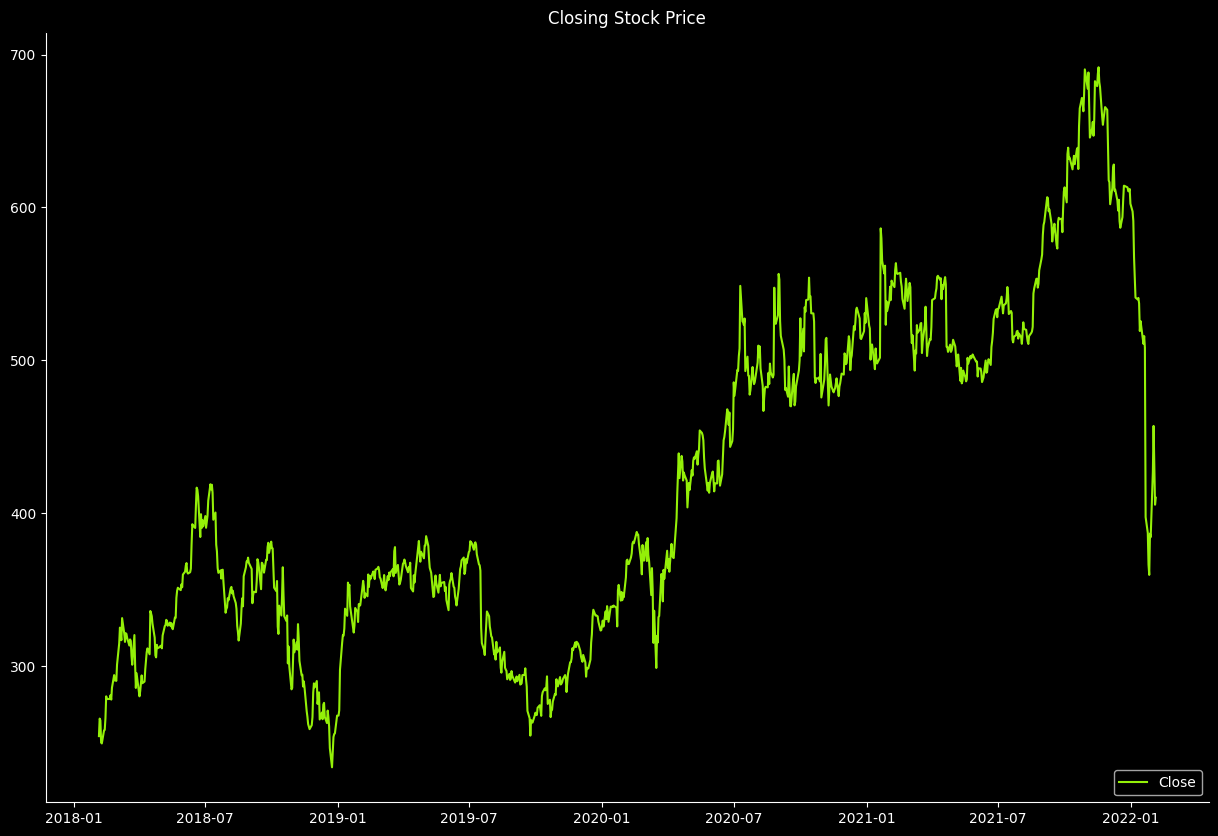

In [79]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

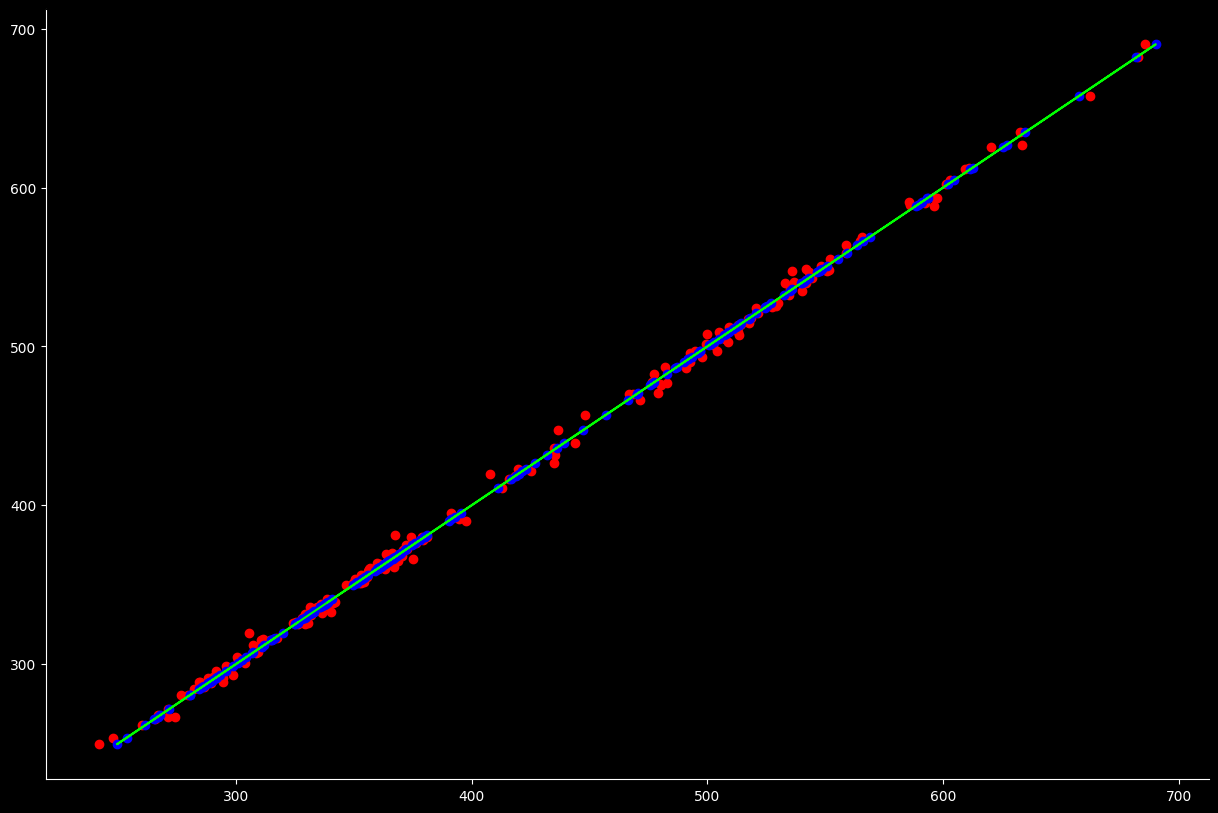

In [80]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [81]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
487,1/13/2020,331.799988,340.850006,331.510010,338.920013,338.920013,6290000,338.740723
618,7/21/2020,506.000000,506.220001,488.609985,490.100006,490.100006,9113700,492.804344
315,5/8/2019,367.920013,369.000000,361.359985,364.369995,364.369995,6572000,363.898203
758,2/9/2021,546.000000,566.000000,543.000000,559.070007,559.070007,3703500,558.773507
845,6/15/2021,501.230011,501.230011,490.399994,491.899994,491.899994,3104100,492.700298
...,...,...,...,...,...,...,...,...
381,8/12/2019,305.459991,312.890015,303.239990,310.829987,310.829987,6531700,309.514488
433,10/24/2019,271.809998,274.019989,268.799988,271.500000,271.500000,4827400,271.097305
986,1/4/2022,599.909973,600.409973,581.599976,591.150024,591.150024,4393100,585.770229
236,1/14/2019,334.239990,335.480011,329.130005,332.940002,332.940002,10499600,332.030342


In [82]:
test_pred[['Close', 'Close_Prediction']].describe().T


,count,mean,std,min,25%,50%,75%,max
Close,202.0,414.734506,105.742109,249.470001,332.737510,369.844986,508.614998,690.309998
Close_Prediction,202.0,414.447183,105.947394,241.823699,332.047471,369.425348,508.971793,685.817088


In [83]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%m/%d/%Y')

In [84]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-09,249.470001,241.823699
2018-02-10,NaN,NaN
2018-02-11,NaN,NaN
2018-02-12,NaN,NaN
2018-02-13,NaN,NaN
...,...,...
2022-01-28,NaN,NaN
2022-01-29,NaN,NaN
2022-01-30,NaN,NaN


In [85]:
output.to_csv('Dataset/Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!


In [86]:
def predict_stock_price(open_price, high_price, low_price, volume):
    input_data = np.array([open_price, high_price, low_price, volume]).reshape(1, -1)
    predicted_price = model_lnr.predict(input_data)
    return predicted_price[0]

In [87]:
# User input
user_open = float(input("Enter the Open price: "))
user_high = float(input("Enter the High price: "))
user_low = float(input("Enter the Low price: "))
user_volume = float(input("Enter the Volume: "))

# Predict using user input
predicted_stock_price = predict_stock_price(user_open, user_high, user_low, user_volume)
print(f"Predicted Close Price: {predicted_stock_price}")
